# MNIST autoencoder from nnBuilder

A basic convolutional autoencoder for MNIST

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *
from nnAuto import *

In [2]:
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
encoder=[]
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=2,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=4,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
encoder.append(dict(type="Linear",size=32*2))
decoder=[]
decoder.append(dict(type="Relu",size=49*4))
decoder.append(dict(type="Reshape",shape=[-1,7,7,4]))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=2,relu=True))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=1,relu=False))
decoder.append(dict(type="Sigmoid_Feature"))

autoencoder=Layer(x=data,type="Autoencoder",encoder=encoder,decoder=decoder)
autoencoder_eval=autoencoder.copy(x=data,test=True)
autoencoder_test=autoencoder.copy(x=data_test,test=True)

trainer=LabeledTrainer(network=autoencoder,optimizer="adam",loss="network")
tester_eval=LabeledTrainer(network=autoencoder_eval,loss="network",test=True)
tester=LabeledTrainer(network=autoencoder_test,loss="network",test=True)

sess=SessManager()

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


<IPython.core.display.Javascript object>


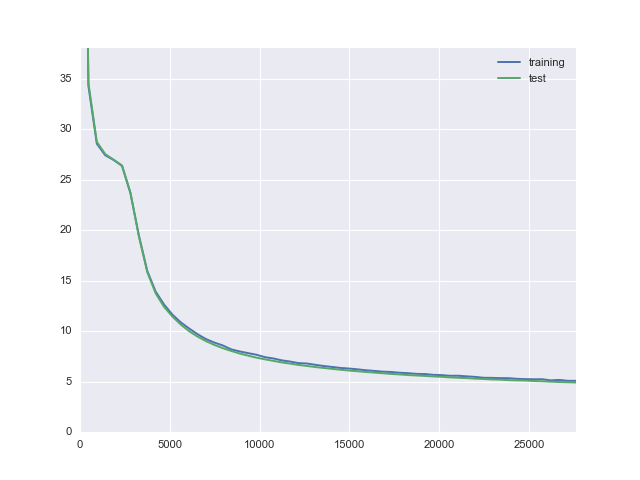

KeyboardInterrupt: 

In [3]:
batches_per_step=60000//128 #About 1 epoch
batches_per_eval=100
n_steps=500
def make_plt():
    %matplotlib notebook
    global fig,ax,train_plot,test_plot#,eval_plot
    fig,ax = plt.subplots(1,1)
    train_plot=ax.plot([],[], label="training")[0]
    #eval_plot=ax.plot([],[], label="eval")[0]
    test_plot=ax.plot([],[], label="test")[0]
    ax.set_ylim(0,1)
    plt.legend()
    fig.canvas.draw()
    time.sleep(.01)
def update_plt():
    x=[batches_per_step*i for i in range(len(trains))]
    train_plot.set_xdata(x)
    train_plot.set_ydata(trains)
    test_plot.set_xdata(x)
    test_plot.set_ydata(tests)
    #eval_plot.set_xdata(x)
    #eval_plot.set_ydata(evals)
    ax.set_xlim(0,x[-1])
    ax.set_ylim(0,tests[1]*1.1)
    fig.canvas.draw()
    #time.sleep(.01)
if "trains" not in globals():
    trains=[trainer.eval_loss(n=batches_per_eval,show=False)]
    #evals=[trainer_eval.eval_loss(n=batches_per_eval)]
    tests=[tester.eval_loss(show=False)]
make_plt()
for i in range(n_steps):
    trainer.train(batches_per_step,learn_rate=1e-4)
    trains.append(trainer.eval_loss(n=batches_per_eval,show=False)) 
    #evals.append(trainer_eval.eval_loss(n=batches_per_eval)) 
    tests.append(tester.eval_loss(show=False))
    update_plt()

In [4]:
network.save() #The full network definition

NameError: name 'network' is not defined